# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

sns.set(palette='Set2')

---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Оценка $S^2$ являются смещенной для дисперсии нормального распределения, а $\frac{n}{n-1}S^2$ - нет

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture1_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


**Решение:**

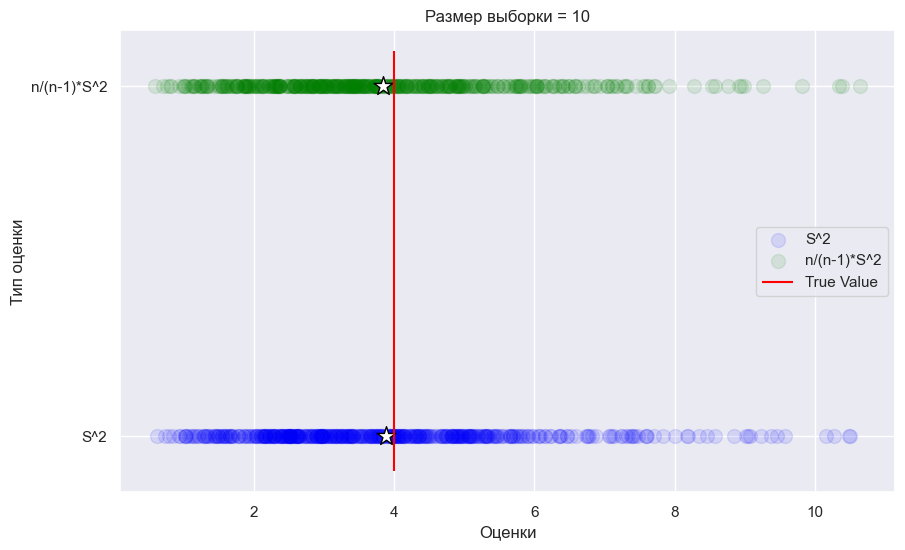

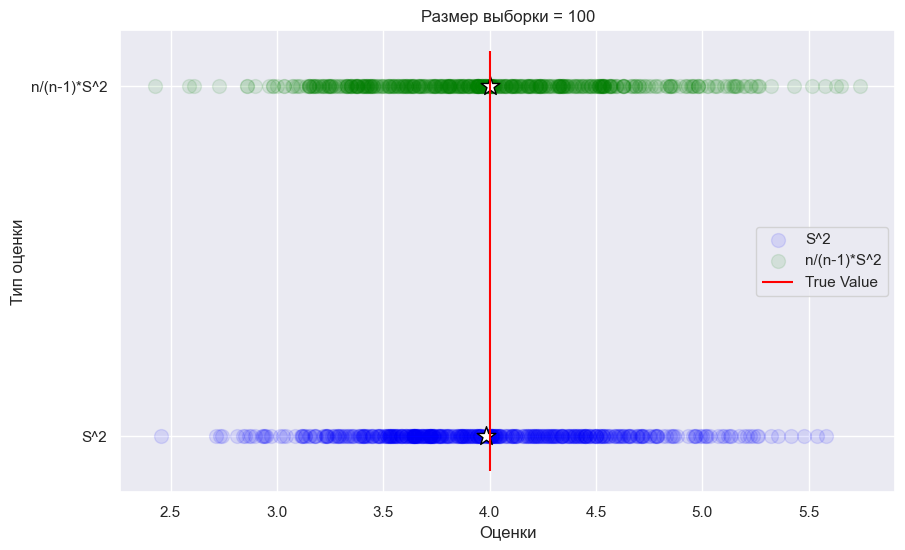

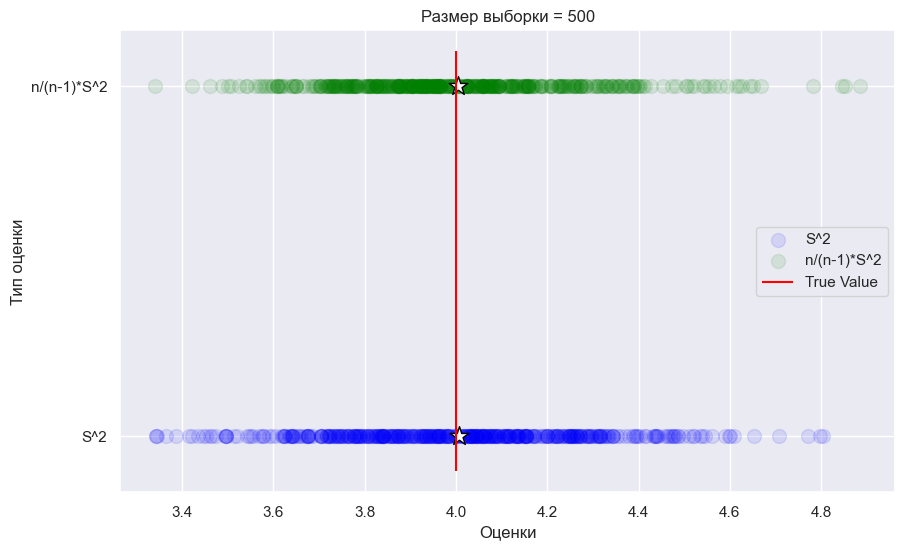

In [2]:
# # Вначале:
# plt.figure(figsize=<размер>)
#
# # Для каждой оценки:
# # y - номер оценки
# plt.scatter(<независимые оценки> , np.zeros(k) + y,
#             alpha=0.1, s=100, color=<цвет>, label=<метка>)
# plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200,
#             color='w', edgecolors='black')
#
# # Для всего графика:
# plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
# plt.title(f'Размер выборки = {n}')
# plt.yticks([])
# plt.legend()
# Параметры
n_values = [10, 100, 500]  # Размер выборки
k = 500  # Количество оценок
sigma = 2  # Истинное значение параметра

# Функция для генерации независимых оценок
def generate_estimates(n, k, sigma):
    estimates = []
    for _ in range(k):
        sample = np.random.normal(0, sigma, n)
        estimate = np.var(sample, ddof=1)  # Несмещенная оценка
        estimates.append(estimate)
    return estimates

# Функция для визуализации оценок
def plot_estimates(n_values, k, sigma):
    colors = ['blue', 'green']  # Цвета для различных оценок
    labels = ['S^2', 'n/(n-1)*S^2']  # Метки для легенды

    for n in n_values:
        plt.figure(figsize=(10, 6))
        plt.title(f'Размер выборки = {n}')
        plt.xlabel('Оценки')
        plt.ylabel('Тип оценки')

        for i, estimator in enumerate([np.var, lambda x: np.var(x, ddof=1)]):
            estimates = generate_estimates(n, k, sigma)
            plt.scatter(estimates, np.zeros(k) + i, alpha=0.1, s=100, color=colors[i], label=labels[i])
            plt.scatter(np.mean(estimates), i, marker='*', s=200, color='white', edgecolors='black')

        plt.vlines(sigma**2, -0.1, 1.1, color='red', label='True Value')
        plt.yticks([0, 1], ['S^2', 'n/(n-1)*S^2'])
        plt.legend()
        plt.show()

plot_estimates(n_values, k, sigma)


**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

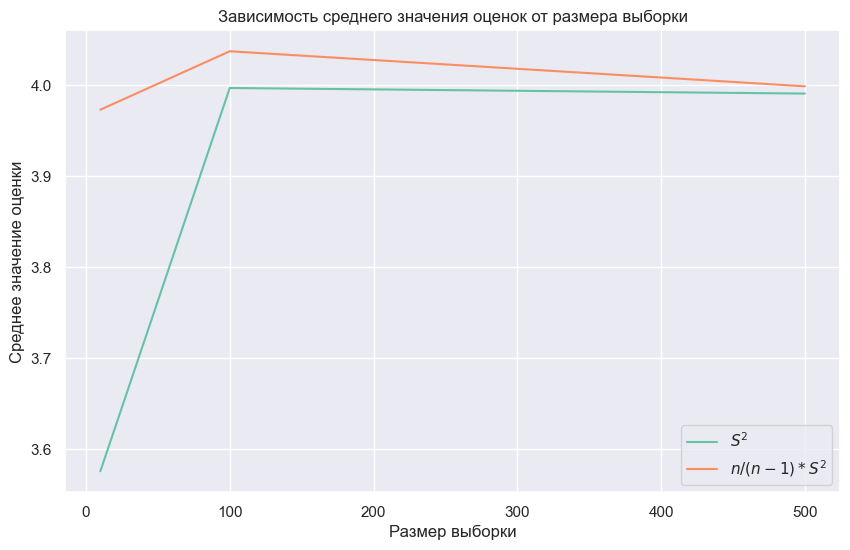

In [3]:
def generate_estimates(n, k, sigma):
    samples = np.random.normal(0, sigma, (k, n))
    s_squared_estimates = np.var(samples, axis=1)
    corrected_s_squared_estimates = np.var(samples, axis=1, ddof=1)
    return s_squared_estimates.mean(), corrected_s_squared_estimates.mean()

mean_estimates = np.array([generate_estimates(n, k, sigma) for n in n_values])

plt.figure(figsize=(10, 6))
plt.plot(n_values, mean_estimates[:, 0], label='$S^2$')
plt.plot(n_values, mean_estimates[:, 1], label='$n/(n-1)*S^2$')
plt.xlabel('Размер выборки')
plt.ylabel('Среднее значение оценки')
plt.title('Зависимость среднего значения оценок от размера выборки')
plt.legend()
plt.grid(True)
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? 

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:**

Математическое ожидание этой оценки равно истинному значению параметра, который она оценивает. Мы также можем заметить что все будет стремиться к среднему.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.
 
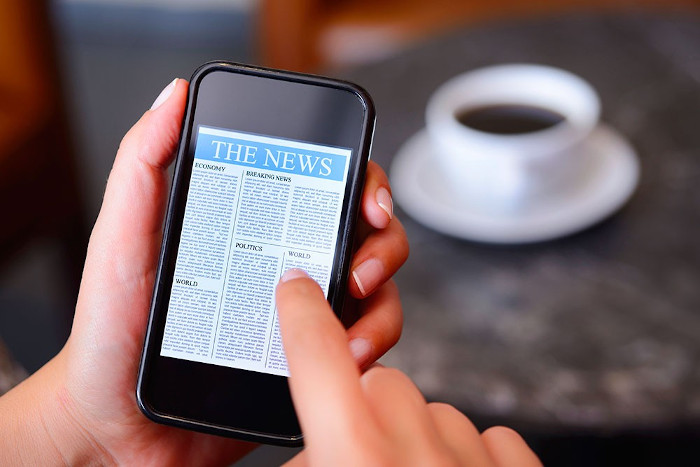



Перед выполнением задачи обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [5]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [6]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [7]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [8]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data_train['data'], data_train['target'], test_size=0.2, random_state=42)

Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

parameters = {
    'countvectorizer__min_df': [1, 2, 3, 4, 5],
    'countvectorizer__max_features': [None, 10, 100, 500, 1000]
}

model = make_pipeline(CountVectorizer(), MultinomialNB())

grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

accuracy = grid_search.best_score_

best_params, accuracy

({'countvectorizer__max_features': None, 'countvectorizer__min_df': 3},
 0.7923987540841573)

Посчитайте качество на тестовой выборке.

In [11]:
from sklearn.metrics import accuracy_score
X_test, y_test = data_test['data'], data_test['target']

best_min_df = 1
best_max_features = None

best_model = make_pipeline(CountVectorizer(min_df=best_min_df, max_features=best_max_features), MultinomialNB())

best_model.fit(X_train, y_train)

prediction = best_model.predict(X_test)

accuracy = accuracy_score(y_test, prediction)
accuracy

0.6711364843335104

Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

In [26]:
import  torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

train_data = TensorDataset(X_train, y_train)

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pretrained_embedding=None):
        super(GRUClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if pretrained_embedding is not None:
            self.embedding.weight.data.copy_(torch.from_numpy(pretrained_embedding))
            self.embedding.weight.requires_grad = False
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.fc(output[:, -1, :])
        return output


model = GRUClassifier(11267, 512, 64, 64)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

for epoch in range(64):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

model.eval()
with torch.no_grad():
    predictions = model(X_test)
    _, predicted_labels = torch.max(predictions, 1)
    test_accuracy = accuracy_score(y_test.numpy(), predicted_labels.numpy())

print("Test Accuracy:", test_accuracy)

0.7222413778425003


Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?
Качество у нейросети выше, но невсегда нейросеть дает лучший результат

Сделайте выводы.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова. 

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.


В QDA:

Уравнение разделяющей поверхности между классами $k$ и $\ell$ в QDA имеет квадратичную форму, так как условное распределение $X$ при условии $Y=k$ представляется многомерным нормальным распределением с матрицей ковариации $\Sigma_k$, а значит, вероятность принадлежности к классу $k$ для произвольной точки $x$ выражается через квадратичную форму.

В LDA:

В LDA предполагается, что матрицы ковариации $\Sigma_1 = \Sigma_2 = \ldots = \Sigma_k = \Sigma$. В таком случае, условные распределения $X$ при условии $Y=k$ также будут многомерными нормальными, но с одинаковыми матрицами ковариации для всех классов. В этом случае уравнение разделяющей поверхности между классами $k$ и $\ell$ является линейным, так как логарифм отношения вероятностей принадлежности к разным классам представляется линейной формой относительно $x$.

Примеры разделяющих поверхностей для QDA при $d=2$:

Гипербола:
$a_0 = (0, 0)$, $a_1 = (1, 1)$
$\Sigma_0 = \begin{pmatrix} 1 & 0 \ 0 & 1 \end{pmatrix}$, $\Sigma_1 = \begin{pmatrix} 1 & 0 \ 0 & -1 \end{pmatrix}$
$\mathsf{P}(Y=0) = \mathsf{P}(Y=1) = 0.5$
Парабола:
$a_0 = (0, 0)$, $a_1 = (0, 1)$
$\Sigma_0 = \begin{pmatrix} 1 & 0 \ 0 & 1 \end{pmatrix}$, $\Sigma_1 = \begin{pmatrix} 1 & 0 \ 0 & 0 \end{pmatrix}$
$\mathsf{P}(Y=0) = \mathsf{P}(Y=1) = 0.5$
Две параллельные прямые:
$a_0 = (0, 0)$, $a_1 = (0, 2)$
$\Sigma_0 = \begin{pmatrix} 1 & 0 \ 0 & 1 \end{pmatrix}$, $\Sigma_1 = \begin{pmatrix} 1 & 0 \ 0 & 1 \end{pmatrix}$
$\mathsf{P}(Y=0) = \mathsf{P}(Y=1) = 0.5$
Две пересекающиеся прямые:
$a_0 = (0, 0)$, $a_1 = (0, 0)$
$\Sigma_0 = \begin{pmatrix} 1 & 0 \ 0 & 1 \end{pmatrix}$, $\Sigma_1 = \begin{pmatrix} 1 & 0 \ 0 & 1 \end{pmatrix}$
$\mathsf{P}(Y=0) = 0.9$, $\mathsf{P}(Y=1) = 0.1$